# Project-1
Apply

logistic Regression

SVM

Decision Tree

RandomForest

on the Loan dataset and check were you will get the best possible accuracy

project note : Dependent Variable is Loan Status

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [7]:
print(object_columns["Loan_ID"].value_counts())
print()
print(object_columns["Loan_ID"].nunique())

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

614


In [8]:
print(object_columns["Gender"].value_counts())
print()
print(object_columns["Gender"].nunique())

Male      489
Female    112
Name: Gender, dtype: int64

2


In [9]:
print(object_columns["Married"].value_counts())
print()
print(object_columns["Married"].nunique())

Yes    398
No     213
Name: Married, dtype: int64

2


In [10]:
print(object_columns["Dependents"].value_counts())
print()
print(object_columns["Dependents"].nunique())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

4


In [11]:
print(object_columns["Education"].value_counts())
print()
print(object_columns["Education"].nunique())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

2


In [12]:
print(object_columns["Gender"].value_counts())
print()
print(object_columns["Gender"].nunique())

Male      489
Female    112
Name: Gender, dtype: int64

2


In [13]:
print(object_columns["Self_Employed"].value_counts())
print()
print(object_columns["Self_Employed"].nunique())

No     500
Yes     82
Name: Self_Employed, dtype: int64

2


In [14]:
print(object_columns["Property_Area"].value_counts())
print()
print(object_columns["Property_Area"].nunique())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

3


In [15]:
print(object_columns["Loan_Status"].value_counts())
print()
print(object_columns["Loan_Status"].nunique())

Y    422
N    192
Name: Loan_Status, dtype: int64

2


In [16]:
object_columns.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
#Removing Loan_ID column 

In [18]:
df = df.drop('Loan_ID', axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
object_columns1 = df.select_dtypes(include=['object'])
object_columns1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


# Handling Null values in same columns


In [20]:
object_columns1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         601 non-null    object
 1   Married        611 non-null    object
 2   Dependents     599 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  582 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [21]:
object_columns1.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [23]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [24]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [25]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [26]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [28]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
df = df.replace(to_replace='3+', value=4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [31]:
df['Dependents'] = df['Dependents'].astype(int)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 55.3+ KB


In [33]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
from sklearn import preprocessing
le_Loan = preprocessing.LabelEncoder()
le_Loan.fit(['Y','N'])
df['Loan_Status'] = le_Loan.transform(df['Loan_Status'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(2), int64(6)
memory usage: 52.9 KB


# Lets find out which value is best for int columns with help of std()

In [36]:
df = df.astype(float)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


In [37]:
new_df = df.copy()

In [38]:
print(new_df.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [39]:
df_mean = new_df.copy()
df_median = new_df.copy()
df_mode =new_df.copy()

In [40]:
df_mean['LoanAmount'] = df_mean['LoanAmount'].fillna(df_mean['LoanAmount'].mean())
df_mean['Loan_Amount_Term'] = df_mean['Loan_Amount_Term'].fillna(df_mean['Loan_Amount_Term'].mean())
df_mean['Credit_History'] = df_mean['Credit_History'].fillna(df_mean['Credit_History'].mean())

In [41]:
df_median['LoanAmount'] = df_median['LoanAmount'].fillna(df_median['LoanAmount'].median())
df_median['Loan_Amount_Term'] = df_median['Loan_Amount_Term'].fillna(df_median['Loan_Amount_Term'].median())
df_median['Credit_History'] = df_median['Credit_History'].fillna(df_median['Credit_History'].median())


In [42]:
df_mode['LoanAmount'] = df_mode['LoanAmount'].fillna(df_mode['LoanAmount'].mode()[0])
df_mode['Loan_Amount_Term'] = df_mode['Loan_Amount_Term'].fillna(df_mode['Loan_Amount_Term'].mode()[0])
df_mode['Credit_History'] = df_mode['Credit_History'].fillna(df_mode['Credit_History'].mode()[0])

In [43]:
print(new_df['LoanAmount'].std())
print(new_df['Loan_Amount_Term'].std())
print(new_df['Credit_History'].std())

85.58732523570545
65.12040985461256
0.3648783192364049


In [44]:
print(df_mean['LoanAmount'].std())
print(df_mean['Loan_Amount_Term'].std())
print(df_mean['Credit_History'].std())

84.0374676831965
64.37248862679246
0.3496809866561489


In [45]:
print(df_median['LoanAmount'].std())
print(df_median['Loan_Amount_Term'].std())
print(df_median['Credit_History'].std())

84.10723338042615
64.42862906767301
0.3523386063583013


In [46]:
print(df_mode['LoanAmount'].std()) # nearest std
print(df_mode['Loan_Amount_Term'].std()) # nearest std 
print(df_mode['Credit_History'].std()) # nearest std  

84.1809670102725
64.42862906767301
0.3523386063583013


In [47]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


# Lets apply mode on main data set

In [48]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [49]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


In [51]:
df['Loan_Status'] = df['Loan_Status'].astype('int')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,120.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1


In [52]:
y_loan = df[df['Loan_Status']==1]

n_loan = df[df['Loan_Status']==0]
print(y_loan.shape,n_loan.shape)


(422, 12) (192, 12)


# Visualisation and understanding

<AxesSubplot:xlabel='Education', ylabel='count'>

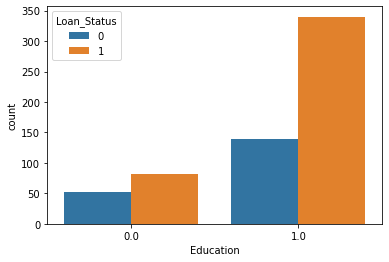

In [53]:
# plotting data Education column
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

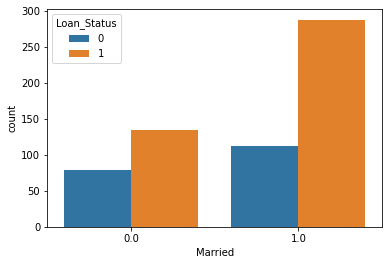

In [54]:
#Married column
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

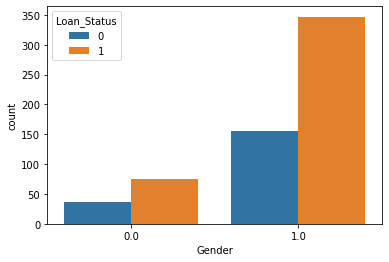

In [55]:
#gemder coloum
sns.countplot(x='Gender',hue='Loan_Status',data=df)

# Applying MIC

In [56]:
X = df.drop(['Loan_Status'], axis = 1) 

In [57]:
columnnames = X.columns

In [58]:
X = X.values # converting it into array

In [59]:
dv = df['Loan_Status'].values

In [60]:
from sklearn.feature_selection import mutual_info_classif

In [61]:
MIC = mutual_info_classif(X, dv)

In [62]:
MIC

array([0.02626558, 0.01721786, 0.01611265, 0.        , 0.        ,
       0.00315705, 0.02720343, 0.        , 0.        , 0.14776244,
       0.00118327])

In [63]:
MIC_ser = pd.Series(MIC)

In [64]:
MIC_ser

0     0.026266
1     0.017218
2     0.016113
3     0.000000
4     0.000000
5     0.003157
6     0.027203
7     0.000000
8     0.000000
9     0.147762
10    0.001183
dtype: float64

In [65]:
MIC_ser.index = columnnames

In [66]:
MIC_ser

Gender               0.026266
Married              0.017218
Dependents           0.016113
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.003157
CoapplicantIncome    0.027203
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       0.147762
Property_Area        0.001183
dtype: float64

In [67]:
MIC_ser.sort_values(ascending=False)

Credit_History       0.147762
CoapplicantIncome    0.027203
Gender               0.026266
Married              0.017218
Dependents           0.016113
ApplicantIncome      0.003157
Property_Area        0.001183
Education            0.000000
Self_Employed        0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
dtype: float64

In [68]:
removable_columns = []
for i in MIC_ser.index:
    if MIC_ser[i] < 0.002:
        print(i,"==>",MIC_ser[i])
        
        removable_columns.append(i)

Education ==> 0.0
Self_Employed ==> 0.0
LoanAmount ==> 0.0
Loan_Amount_Term ==> 0.0
Property_Area ==> 0.0011832734475176743


In [69]:
removable_columns

['Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Property_Area']

# Applying Logistic regression on data after MIC   on MIC DATA

In [70]:
mic_df = df.drop(removable_columns, axis = 1)

In [71]:
mic_df

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,1.0,1
1,1.0,1.0,1.0,4583.0,1508.0,1.0,0
2,1.0,1.0,0.0,3000.0,0.0,1.0,1
3,1.0,1.0,0.0,2583.0,2358.0,1.0,1
4,1.0,0.0,0.0,6000.0,0.0,1.0,1
...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,2900.0,0.0,1.0,1
610,1.0,1.0,4.0,4106.0,0.0,1.0,1
611,1.0,1.0,1.0,8072.0,240.0,1.0,1
612,1.0,1.0,2.0,7583.0,0.0,1.0,1


In [72]:
mic_df.columns

Index(['Gender', 'Married', 'Dependents', 'ApplicantIncome',
       'CoapplicantIncome', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [73]:
IV = mic_df.drop('Loan_Status', axis=1).values
DV = mic_df['Loan_Status'].values


In [74]:
from sklearn import preprocessing
IV = preprocessing.StandardScaler().fit(IV).transform(IV)


In [75]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( IV, DV, test_size=0.1, random_state=161) 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (552, 6) (552,)
Test set: (62, 6) (62,)


In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg')
LR.fit(X_train,y_train) #training 

LogisticRegression(solver='newton-cg')

In [77]:
yhat_prob = LR.predict_proba(X_test)

In [78]:
yhat = LR.predict(X_test)

In [79]:
from sklearn.metrics import f1_score
print(f"F1 Score: {(f1_score(y_test, yhat))*100:.2f}")

F1 Score: 95.15


# Applying Loop for finding best Accuracy

In [80]:

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_accuracy = 0
best_random_state = 0
best_solver = ''

for size in range(11, 301):
    IV = mic_df.drop('Loan_Status', axis=1).values
    DV = mic_df['Loan_Status'].values
    IV = preprocessing.StandardScaler().fit(IV).transform(IV)
    X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.1, random_state=size) 
    
    for solver in solvers:
        LR = LogisticRegression(solver=solver)
        LR.fit(X_train, y_train)  # Training
        yhat = LR.predict(X_test)
        
        f1 = f1_score(y_test, yhat) * 100
        
        if f1 > best_accuracy:
            best_accuracy = f1
            best_random_state = size
            best_solver = solver

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Random State: {best_random_state}")
print(f"Solver: {best_solver}")


Best Accuracy: 95.15
Random State: 161
Solver: newton-cg


# Applying SVM on MIC_DATA frame

In [81]:
mic_df

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,1.0,1
1,1.0,1.0,1.0,4583.0,1508.0,1.0,0
2,1.0,1.0,0.0,3000.0,0.0,1.0,1
3,1.0,1.0,0.0,2583.0,2358.0,1.0,1
4,1.0,0.0,0.0,6000.0,0.0,1.0,1
...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,2900.0,0.0,1.0,1
610,1.0,1.0,4.0,4106.0,0.0,1.0,1
611,1.0,1.0,1.0,8072.0,240.0,1.0,1
612,1.0,1.0,2.0,7583.0,0.0,1.0,1


In [82]:
IV = mic_df.drop('Loan_Status', axis=1).values
DV= mic_df['Loan_Status'].values

In [83]:
IV = preprocessing.StandardScaler().fit(IV).transform(IV)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.1, random_state=158)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (552, 6) (552,)
Test set: (62, 6) (62,)


In [85]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [86]:
yhat = clf.predict(X_test)  

In [87]:
from sklearn.metrics import f1_score
f"F1 score: {f1_score(y_test, yhat, average='weighted') *100:.2f}%"

'F1 score: 91.59%'

# Applying Loop for best accuracy

In [88]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_random_state = 0
best_kernel = ''

for random_state in range(10, 301):
    IV = mic_df.drop('Loan_Status', axis=1).values
    DV = mic_df['Loan_Status'].values
    IV = preprocessing.StandardScaler().fit(IV).transform(IV)
    X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.1, random_state=random_state)
    
    for kernel in kernels:
        clf = svm.SVC(kernel=kernel)
        clf.fit(X_train, y_train)
        yhat = clf.predict(X_test)
        
        f1 = f1_score(y_test, yhat, average='weighted')
        
        if f1 > best_accuracy:
            best_accuracy = f1
            best_random_state = random_state
            best_kernel = kernel

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Random State: {best_random_state}")
print(f"Kernel: {best_kernel}")

Best Accuracy: 0.92
Random State: 158
Kernel: linear


# Applying Decision Tree on MIC processed data

In [89]:
mic_df

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,1.0,1
1,1.0,1.0,1.0,4583.0,1508.0,1.0,0
2,1.0,1.0,0.0,3000.0,0.0,1.0,1
3,1.0,1.0,0.0,2583.0,2358.0,1.0,1
4,1.0,0.0,0.0,6000.0,0.0,1.0,1
...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,2900.0,0.0,1.0,1
610,1.0,1.0,4.0,4106.0,0.0,1.0,1
611,1.0,1.0,1.0,8072.0,240.0,1.0,1
612,1.0,1.0,2.0,7583.0,0.0,1.0,1


In [90]:
IV = mic_df.drop('Loan_Status', axis=1).values
DV= mic_df['Loan_Status'].values

In [91]:
IV = preprocessing.StandardScaler().fit(IV).transform(IV)

In [92]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(IV, DV, test_size=0.1, random_state=6)

In [93]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [94]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [95]:
y_pred = drugTree.predict(X_testset)

In [96]:
from sklearn import metrics

In [97]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred)*100)

DecisionTrees's Accuracy:  91.93548387096774


# Applying Loop for best accuracy 

In [98]:
best_accuracy = 0
best_random_state = 0
best_max_depth = 0

IV = mic_df.drop('Loan_Status', axis=1).values
DV = mic_df['Loan_Status'].values
IV = preprocessing.StandardScaler().fit(IV).transform(IV)

for random_state in range(1, 301):
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(IV, DV, test_size=0.1, random_state=random_state)
    
    for max_depth in range(2, 11):
        drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
        drugTree.fit(X_trainset, y_trainset)
        y_pred = drugTree.predict(X_testset)
        
        accuracy = metrics.accuracy_score(y_testset, y_pred) * 100
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state
            best_max_depth = max_depth

print("Best Accuracy: ", best_accuracy)
print("Random State: ", best_random_state)
print("Max Depth: ", best_max_depth)

Best Accuracy:  91.93548387096774
Random State:  6
Max Depth:  2


# Applying RandomForest on MIC processed data

In [99]:
mic_df

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,1.0,1
1,1.0,1.0,1.0,4583.0,1508.0,1.0,0
2,1.0,1.0,0.0,3000.0,0.0,1.0,1
3,1.0,1.0,0.0,2583.0,2358.0,1.0,1
4,1.0,0.0,0.0,6000.0,0.0,1.0,1
...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,2900.0,0.0,1.0,1
610,1.0,1.0,4.0,4106.0,0.0,1.0,1
611,1.0,1.0,1.0,8072.0,240.0,1.0,1
612,1.0,1.0,2.0,7583.0,0.0,1.0,1


In [100]:
IV = mic_df.drop('Loan_Status', axis=1).values
DV= mic_df['Loan_Status'].values


In [101]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(IV, DV, test_size = 0.1, random_state = 6)


In [102]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [103]:
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 9, criterion = 'entropy')


In [105]:
classifier.fit(X_Train,Y_Train)


RandomForestClassifier(criterion='entropy', n_estimators=9)

In [106]:
Y_Pred = classifier.predict(X_Test)

In [107]:
from sklearn.metrics import f1_score
f1_score(Y_Test,Y_Pred)*100

86.95652173913044

# Using Loops to find best accuracy

In [108]:
best_accuracy = 0
best_random_state = 0
best_n_estimators = 0

IV = mic_df.drop('Loan_Status', axis=1).values
DV = mic_df['Loan_Status'].values

for random_state in range(1, 201):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(IV, DV, test_size=0.1, random_state=random_state)
    sc_X = StandardScaler()
    X_Train = sc_X.fit_transform(X_Train)
    X_Test = sc_X.transform(X_Test)
    
    for n_estimators in range(1, 21):
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy')
        classifier.fit(X_Train, Y_Train)
        Y_Pred = classifier.predict(X_Test)
        
        accuracy = f1_score(Y_Test, Y_Pred) * 100
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state
            best_n_estimators = n_estimators

print("Best Accuracy: ", best_accuracy)
print("Random State: ", best_random_state)
print("n_estimators: ", best_n_estimators)

Best Accuracy:  95.55555555555556
Random State:  139
n_estimators:  6


# Now I am applying all Machine learning models on complete data

# logistic Regression on complete data

In [109]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [110]:
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,120.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1


In [111]:
IV1 = df.drop('Loan_Status', axis=1).values
DV1= df['Loan_Status'].values


In [112]:
IV1 = preprocessing.StandardScaler().fit(IV1).transform(IV1)


In [113]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( IV1, DV1, test_size=0.1, random_state=161) 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (552, 11) (552,)
Test set: (62, 11) (62,)


In [114]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg')
LR.fit(X_train,y_train) #training 
LR

LogisticRegression(solver='newton-cg')

In [115]:
yhat = LR.predict(X_test)

In [116]:
yhat_prob = LR.predict_proba(X_test)

In [117]:
from sklearn.metrics import f1_score
print(f"F1 Score: {(f1_score(y_test, yhat))*100:.2f}")

F1 Score: 95.15


# creating loop to find highest F1 score

In [118]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_accuracy = 0
best_random_state = 0
best_solver = ''

for size in range(11, 301):
    IV1 = df.drop('Loan_Status', axis=1).values
    DV1 = df['Loan_Status'].values
    IV1 = preprocessing.StandardScaler().fit(IV1).transform(IV1)
    X_train, X_test, y_train, y_test = train_test_split(IV1, DV1, test_size=0.1, random_state=size) 
    
    for solver in solvers:
        LR = LogisticRegression(solver=solver)
        LR.fit(X_train, y_train)  # Training
        yhat = LR.predict(X_test)
        
        f1 = f1_score(y_test, yhat) * 100
        
        if f1 > best_accuracy:
            best_accuracy = f1
            best_random_state = size
            best_solver = solver

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Random State: {best_random_state}")
print(f"Solver: {best_solver}")


Best Accuracy: 95.15
Random State: 161
Solver: newton-cg


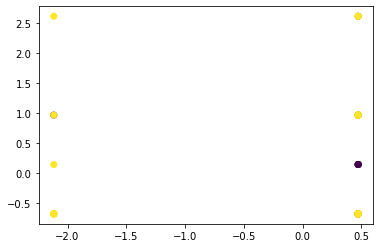

In [119]:
plt.scatter(X_test[:,0],X_test[:,2],c = y_test)

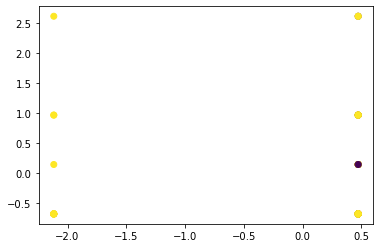

In [120]:
plt.scatter(X_test[:,0],X_test[:,2],c = yhat)

### On MIC processed data as well as on orignal data we got same F1_Score 
 

# Applying SVM   

In [121]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,120.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1


In [122]:
IV = df.drop('Loan_Status', axis=1).values
DV= df['Loan_Status'].values


In [123]:
IV = preprocessing.StandardScaler().fit(IV).transform(IV)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.1, random_state=158)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (552, 11) (552,)
Test set: (62, 11) (62,)


In [125]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [126]:
yhat = clf.predict(X_test)  

In [127]:
from sklearn.metrics import f1_score
f"F1 score: {f1_score(y_test, yhat, average='weighted') *100:.2f}%"


'F1 score: 91.59%'

# Using Loop to get best accurary

In [128]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_random_state = 0
best_kernel = ''

for random_state in range(10, 301):
    IV = df.drop('Loan_Status', axis=1).values
    DV = df['Loan_Status'].values
    IV = preprocessing.StandardScaler().fit(IV).transform(IV)
    X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.1, random_state=random_state)
    
    for kernel in kernels:
        clf = svm.SVC(kernel=kernel)
        clf.fit(X_train, y_train)
        yhat = clf.predict(X_test)
        
        f1 = f1_score(y_test, yhat, average='weighted')
        
        if f1 > best_accuracy:
            best_accuracy = f1
            best_random_state = random_state
            best_kernel = kernel

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Random State: {best_random_state}")
print(f"Kernel: {best_kernel}")

Best Accuracy: 0.92
Random State: 158
Kernel: linear


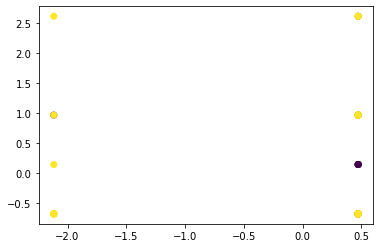

In [129]:
plt.scatter(X_test[:,0],X_test[:,2],c = y_test)

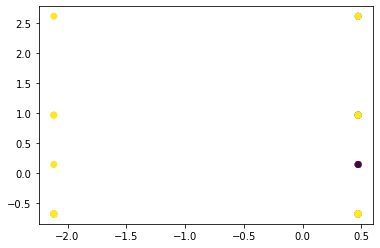

In [130]:
plt.scatter(X_test[:,0],X_test[:,2],c = yhat)

### On MIC processed data as well as on orignal data we got same F1_Score 


# Applying Decision Tree 

In [131]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,120.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1


In [132]:
IV = df.drop('Loan_Status', axis=1).values
DV= df['Loan_Status'].values


In [133]:
IV = preprocessing.StandardScaler().fit(IV).transform(IV)

In [134]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(IV, DV, test_size=0.1, random_state=6)

In [135]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [136]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [137]:
y_pred = drugTree.predict(X_testset)

In [138]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred)*100)

DecisionTrees's Accuracy:  91.93548387096774


# applying loop to get best accuracy

In [139]:
best_accuracy = 0
best_random_state = 0
best_max_depth = 0

IV = df.drop('Loan_Status', axis=1).values
DV = df['Loan_Status'].values
IV = preprocessing.StandardScaler().fit(IV).transform(IV)

for random_state in range(1, 301):
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(IV, DV, test_size=0.1, random_state=random_state)
    
    for max_depth in range(2, 11):
        drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
        drugTree.fit(X_trainset, y_trainset)
        y_pred = drugTree.predict(X_testset)
        
        accuracy = metrics.accuracy_score(y_testset, y_pred) * 100
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state
            best_max_depth = max_depth

print("Best Accuracy: ", best_accuracy)
print("Random State: ", best_random_state)
print("Max Depth: ", best_max_depth)

Best Accuracy:  91.93548387096774
Random State:  6
Max Depth:  2


### On MIC processed data as well as on orignal data we got same accuracy in decision tree

# Applying Random Forest 

In [140]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,120.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1


In [141]:
IV = df.drop('Loan_Status', axis=1).values
DV= df['Loan_Status'].values

In [142]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(IV, DV, test_size = 0.1, random_state = 6)

In [143]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [144]:
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy')
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=12)

In [145]:
Y_Pred = classifier.predict(X_Test)

In [146]:
from sklearn.metrics import f1_score
f1_score(Y_Test,Y_Pred)*100

92.78350515463917

# applying loop to get best accuracy

In [147]:
best_accuracy = 0
best_random_state = 0
best_n_estimators = 0

IV = df.drop('Loan_Status', axis=1).values
DV = df['Loan_Status'].values

for random_state in range(1, 201):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(IV, DV, test_size=0.1, random_state=random_state)
    sc_X = StandardScaler()
    X_Train = sc_X.fit_transform(X_Train)
    X_Test = sc_X.transform(X_Test)
    
    for n_estimators in range(1, 21):
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy')
        classifier.fit(X_Train, Y_Train)
        Y_Pred = classifier.predict(X_Test)
        
        accuracy = f1_score(Y_Test, Y_Pred) * 100
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state
            best_n_estimators = n_estimators

print("Best Accuracy: ", best_accuracy)
print("Random State: ", best_random_state)
print("n_estimators: ", best_n_estimators)

Best Accuracy:  96.0
Random State:  6
n_estimators:  15


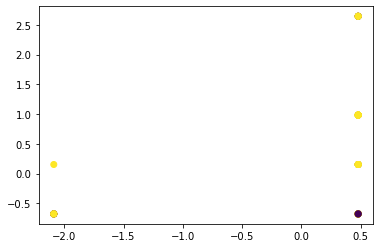

In [148]:
plt.scatter(X_Test[:,0],X_Test[:,2],c = Y_Test)

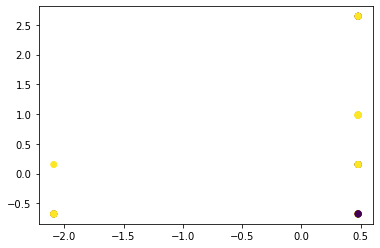

In [149]:
plt.scatter(X_Test[:,0],X_Test[:,2],c = Y_Pred)

# On MIC processed data as well as on orignal data we got same accuracy in Randomforest

# Lets consider full data for web development project

In [152]:
df = df.astype(int)


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int32
 6   CoapplicantIncome  614 non-null    int32
 7   LoanAmount         614 non-null    int32
 8   Loan_Amount_Term   614 non-null    int32
 9   Credit_History     614 non-null    int32
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(12)
memory usage: 28.9 KB


In [154]:
IV1 = df.drop('Loan_Status', axis=1).values
DV1= df['Loan_Status'].values
IV1 = preprocessing.StandardScaler().fit(IV1).transform(IV1)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( IV1, DV1, test_size=0.1, random_state=161) 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg')
LR.fit(X_train,y_train) #training 
LR
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import f1_score
print(f"F1 Score: {(f1_score(y_test, yhat))*100:.2f}")

Train set: (552, 11) (552,)
Test set: (62, 11) (62,)
F1 Score: 95.15


In [155]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0,71,360,1,0,1
610,1,1,4,1,0,4106,0,40,180,1,0,1
611,1,1,1,1,0,8072,240,253,360,1,2,1
612,1,1,2,1,0,7583,0,187,360,1,2,1


In [156]:
int(LR.predict([[1,0,0,1,0,8072,240,220,360,1,1]]))

1

In [157]:
int(LR.predict([[1,0,0,1,0,8072,2240,220,360,1,1]]))

0

In [158]:
import pickle
with open('C:/Users/Rushi Patil/Desktop/Project For CV/lr.pkl', 'wb') as model_file:
    pickle.dump(LR, model_file)

In [159]:
df.to_csv('C:/Users/Rushi Patil/Desktop/Project For CV/data/processed data/Clean_loan.csv', index=False)
